In [1]:
import git 
import pandas as pd
from io import StringIO

GIT_REPO_PATH = r'../../spring-petclinic/'
repo = git.Repo(GIT_REPO_PATH)
git_bin = repo.git
git_log = git_bin.execute('git log --pretty=format:"%h\t%at\t%aN\t%s"')
commits = pd.read_csv(StringIO(git_log), 
    sep="\t",
    header=None,              
    names=['sha', 'timestamp', 'author', 'message']
    )
commits['word_count'] = commits['message'].str.count(" ")+1
commits.head()

,sha,timestamp,author,message,word_count
0,101c9dc,1498817227,Dave Syer,Update Spring Boot and Thymeleaf versions,6
1,ffa967c,1492026060,Antoine Rey,spring-petclinic-angular1 repo renamed to spri...,5
2,fd1c742,1488784768,Antoine Rey,Do not fail maven build when git directing is ...,10
3,f792522,1487331121,Stephane Nicoll,Merge pull request #229 from henri-tremblay:eh...,6
4,75912a0,1487331057,Stephane Nicoll,Polish contribution,2


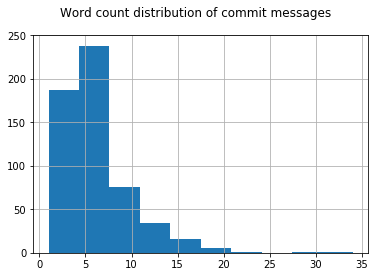

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

commits['word_count'].hist()
plt.suptitle("Word count distribution of commit messages")